# HW 14 - Astropy
ULAB - Physics and Astronomy Division \
Due **Sunday, March 1st, 2025 at 11:59pm** on Gradescope

## 1 Unit Conversion
Import the astropy module `units` as `u` in the cell below.

In [4]:
from astropy import units as u

Convert a speed of **60 km/h** to **m/s**. \
\
Round your answer to two significant digits. *Hint: With an f-string, you can use `:.3f`, like `print(f"{speed_mps:.3f}")`*.

In [6]:
distance = 60* (u.kilometer/u.hour)
print(distance.to(u.meter/u.second))

16.666666666666668 m / s


## 2 Time Manipulation
Define **Julian Date** in the cell below.

In [8]:
print("a julian date is a way for astronomers to measure time in days starting from noon UT on January 1st 4713 BCE")

a julian date is a way for astronomers to measure time in days starting from noon UT on January 1st 4713 BCE


What's the difference between the **Julian calendar** and the **Gregorian calendar**?

In [10]:
print("The Gregorian Calander is the standard calander we are familiar with, ex: March 2, 2025")

The Gregorian Calander is the standard calander we are familiar with, ex: March 2, 2025


From the astropy module `time` import `Time` in the cell below.

In [12]:
from astropy.time import Time

Find the Julian Date for **the current time**. 

In [20]:
now = Time.now()
print(now)

2025-03-03 00:52:07.048361


Convert `1969-07-02 20:17:00` to its **Julian Date**.

In [18]:
time2= Time("1969-07-02 20:17:00")
print(time2.jd)

2440405.345138889


What historically happened at this date and time?

In [2]:
print("NASA was preparing for the apollo 11 moon landing")

NASA was preparing for the apollo 11 moon landing


## 3 Coordinate Transformations
From the astropy module `coordinates` import `SkyCoord`, `Galactic`, `AltAz` and `EarthLocation` in the cell below.

In [22]:
from astropy.coordinates import SkyCoord, Galactic, AltAz, EarthLocation

Define a celestial object at **RA = 15 degrees** and **DEC = -20 degrees** in ICRS. Use the astropy `Time` module.

In [28]:
object = SkyCoord(ra = 15*u.deg, dec = -20*u.deg, frame = 'icrs')
object_time = Time.now()
print(f"Coordinates of object: {object.to_string('hmsdms')}")
print(f"Currect observation time: {object_time}")

Coordinates of object: 01h00m00s -20d00m00s
Currect observation time: 2025-03-03 01:00:08.390783


Convert the object's coordinates from ICSRS to **Galactic**.

In [30]:
object_galactic = object.transform_to(Galactic())
print(object_galactic)

<SkyCoord (Galactic): (l, b) in deg
    (138.76123783, -82.60718782)>


Convert the object's coordinate from ICRS to **AltAz**. For AltAz frame, use the location of **Campbell Hall**.

In [41]:
#icrs coordinates of object 
object_icrs = SkyCoord(ra = 15*u.deg, dec = -20*u.deg, frame = 'icrs')
#setting location
campbell = EarthLocation(lat = 37.8*u.deg, lon = -122.2*u.deg, height = 1*u.m)
obs_time=Time.now()
#making altaz frame
altaz = AltAz(obstime=obs_time, location= campbell)
#making the transformation
object_altaz = object_icrs.transform_to(altaz)
print(object_altaz)

<SkyCoord (AltAz: obstime=2025-03-03 01:11:01.287564, location=(-2688929.16324542, -4269947.04834143, 3887927.77817763) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (221.51981431, 20.47517909)>


## 4 FITS Files
From the astropy module `astropy.io` import `fits` in the cell below.

In [43]:
from astropy.io import fits

From the astropy module `astropy.utils.data` import `download_file`.

In [45]:
from astropy.utils.data import download_file

Import `numpy` in the cell below.

In [47]:
import numpy as np

Use the `download_file` astropy function to create a variable for the location of the `.fits` file from class.

In [49]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

Follow the procedure from lecture to open the `.fits` files in the cell below. Make sure to use the `hdul` format, while calling `hdul.info`, `hdul[0]` and `hdul[1]` appropriately.

In [67]:
filename = "http://data.astropy.org/tutorials/FITS-images/HorseHead.fits" 
image_data = fits.getdata(filename)
with fits.open(image_file) as hdul:
    hdul.info()
    data = hdul[0].data
    header = hdul[0].header

#print(header)

Filename: C:\Users\madic\.astropy\cache\download\url\ff6e0b93871033c68022ca026a956d87\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


With the `np.max` function, find the brightest pixel in the image. Print its value in the cell below.

In [69]:
brightest_pixel = np.max(image_data)
print(brightest_pixel)

22918


With the `np.min` function, find the least brightest pixel in the image. Print its value in the cell below.

In [73]:
dimmist_pixel = np.min(image_data)
print(dimmist_pixel)

3759


## Tables
From the astropy module `astropy.table` import `Table`.

In [75]:
from astropy.table import Table

Make an astropy table with **three** actual stars (so you will need to use google for this part). Include the `name`, `magnitude` and `spectral type`.

In [81]:
#defining the names, maginitudes, spectral types of stars 
star_names = ['Betelgeuse' , 'Sirius', 'Vega']
magnitudes = [0.42, -1.46, 0.03]
type = ['M1-M2', 'A0mA1 Va', 'K0 III']
#making table
star_table = Table([star_names, magnitudes, type],
                   names=('Name', 'Magnitude', 'Spectral Type'))
print(star_table)

   Name    Magnitude Spectral Type
---------- --------- -------------
Betelgeuse      0.42         M1-M2
    Sirius     -1.46      A0mA1 Va
      Vega      0.03        K0 III


Save the table as a `.fits` file. *Hint: Use the function `.write` with the argument `format='fits'`.*

In [85]:
star_table.write("star_table.fits", format='fits', overwrite=True)

Read and print the table in the cell below from the `.fits` file you made.

In [91]:
star_table_fits = Table.read("star_table.fits", format='fits')
print(star_table_fits)

   Name    Magnitude Spectral Type
---------- --------- -------------
Betelgeuse      0.42         M1-M2
    Sirius     -1.46      A0mA1 Va
      Vega      0.03        K0 III


## 6 Advanced... but awesome!
With the Hipparcos catalog, construct a Hertzsprung-Russell (H-R) diagram. Overall you will do the following:
* Download and clean the stellar data from the Hipparcos catalog.
* Calculate the absolute magnitude of the stars.
* Convert and classify spectral types.
* Plot an H-R diagram using both spectral class and color-index (B-V).

In the cell below, define what an **H-R** diagram is.

In [95]:
print("an HR diagram is a scatter plot that relates the luminosity and mangitudes of a star with their temperature, and classifies them into their respective spectral types")

an HR diagram is a scatter plot that relates the luminosity and mangitudes of a star with their temperature, and classifies them into their respective spectral types


### 6.1 Download and Load in the Hipparcos Catalog
The catalog you are downloading contains accurate parallax measurements which will help us determine the **absolute magnitude** of stars. 
* **Absolute mangitude** = the actual brightness of a star
* **Apparent magnitude** = how bright the star appears to us on Earth

Import `pandas` in the cell below.

In [93]:
import pandas as pd

In the cell below import the file `cluster_data.csv` as a pandas dataframe. Add the following arguments:
* skiprows=44
* sep=';'
* header=None
* index_col=0
* names = ['HIP', 'Vmag', 'Plx', 'B-V', 'SpType']
* skipfooter=1
* engine='python'

In [102]:
df = pd.read_csv('cluster_data.tsv',
                 skiprows=44,
                 sep=';',
                 header =None,
                 index_col=0,
                 names = ['HIP','Vmag','Plx','B-V','SpType'],
                 skipfooter =1,
                 engine='python')

Display the first few rows of the data.

In [104]:
print(df.head())

      Vmag      Plx     B-V SpType
HIP                               
10    8.59    10.76   0.489    F6V
11    7.34     4.29   0.081     A2
12    8.43     4.06   1.484  K4III
13    8.80     3.49   1.128  K0III
14    7.25     5.11   1.200     K0


### 6.2 Clean the Data
Some of the rows in the data contain **missing** or **invalid** values so we need to "clean" our data. We will start by replacing the **blank spaces with NaN**, run the cell below.

In [106]:
df_clean = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

C:\Users\madic\AppData\Local\Temp\ipykernel_7652\395354793.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)


Drop the rows with missing (NaN) values. *Hint: Use the `.dropna()` function`.

In [112]:
df_sorted = df_clean.dropna()
print(df_sorted.head())

     Vmag    Plx    B-V SpType
HIP                           
10   8.59  10.76  0.489    F6V
11   7.34   4.29  0.081     A2
12   8.43   4.06  1.484  K4III
13   8.80   3.49  1.128  K0III
14   7.25   5.11  1.200     K0


Run the cell below. We are converting the datatypes in the columns to floats.

In [125]:
df_sorted[['Vmag', 'Plx', 'B-V']] = df_sorted[['Vmag', 'Plx', 'B-V']].astype(float)

# Display dataset summary
print(df_sorted.describe())

                Vmag            Plx            B-V
count  114463.000000  114463.000000  114463.000000
mean        8.297699       7.104872       0.702415
std         1.248614      11.064009       0.490235
min        -1.440000     -35.100000      -0.400000
25%         7.610000       2.520000       0.341000
50%         8.400000       4.580000       0.605000
75%         9.070000       8.260000       1.075000
max        13.610000     772.330000       5.460000


C:\Users\madic\AppData\Local\Temp\ipykernel_7652\3346517525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted[['Vmag', 'Plx', 'B-V']] = df_sorted[['Vmag', 'Plx', 'B-V']].astype(float)


### 6.3 Compute Absolute Magnitude
The absolute magnitude ($M_V$) of a star is given by:

$$
M_V = V_{\text{mag}} + 5 \cdot \log_{10}\left(\frac{\text{Plx}}{100}\right)
$$

Run the cell below.

In [127]:
df_sorted['M_V'] = df_sorted['Vmag'] + 5 * np.log10(df_sorted['Plx'] / 100)
print(df_sorted[['Vmag', 'Plx', 'M_V']].head())

     Vmag    Plx       M_V
HIP                       
10   8.59  10.76  3.749061
11   7.34   4.29  0.502286
12   8.43   4.06  1.472630
13   8.80   3.49  1.514127
14   7.25   5.11  0.792105


C:\Users\madic\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\madic\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\madic\AppData\Local\Temp\ipykernel_7652\2481000665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['M_V'] = df_sorted['Vmag'] + 5 * np.log10(df_sorted['Plx'] / 100)


Describe what the cell above is doing. 

In [116]:
print("the cell above is calculating the absolte magnitude of the first couple stars in the dataframe")

the cell above is calculating the absolte magnitude of the first couple stars in the dataframe


### 6.4 Process the Spectral Types
Stars are defined by their spectral types:
* The first letter (O, B, A, F, G, K, M) indicates the **temperature** of a star.
* The digit (0-9) refines the **classification**.

Now we will extract the first two characters for sorting purposes. Run the cell below.

In [131]:
# Extract the first two characters (e.g., 'G2', 'K3')
df_sorted['SpType2'] = df_sorted['SpType'].str[:2]

# Keep only valid spectral classes
df_sorted = df_sorted[df_sorted['SpType2'].str.match(r'^[OBAFGKM][0-9]')]

# Display unique spectral types
print(df_sorted['SpType2'].unique())

['F6' 'A2' 'K4' 'K0' 'K2' 'F3' 'K5' 'G5' 'G0' 'G8' 'F2' 'G3' 'F7' 'A0'
 'B8' 'F0' 'G6' 'G9' 'K1' 'K3' 'F5' 'G1' 'A4' 'G2' 'B5' 'B9' 'M0' 'F8'
 'M1' 'G7' 'M2' 'B0' 'B7' 'A9' 'M3' 'A3' 'O7' 'A1' 'B4' 'A6' 'B3' 'B2'
 'A5' 'M4' 'A7' 'O8' 'M5' 'G4' 'K7' 'B1' 'O6' 'M6' 'F4' 'A8' 'K8' 'M7'
 'B6' 'O9' 'F9' 'M8' 'M9' 'K9' 'O5' 'F1' 'K6' 'O4']


C:\Users\madic\AppData\Local\Temp\ipykernel_7652\2413044728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['SpType2'] = df_sorted['SpType'].str[:2]


What letter represents the **hottest** stars? What letter represents the **coldest** stars?

In [119]:
print("O is the hottest stars and M is the coldest")

O is the hottest stars and M is the coldest


### 6.5 Plot the H-R Diagram(s)
Conver the spectral types into sortable numerical categories. Run the cell below.

In [133]:
order = {'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
df_sorted['SpType2_numeric'] = df_sorted['SpType2'].apply(lambda x: order[x[0]]*10 + int(x[1]))

Import `matplotlib.pyplot` in the cell below.

In [123]:
import matplotlib.pyplot as plt

**Spectral Type vs. Absolute Magnitude** \
Scatter the `df_clean['SpType2_numeric']` on the x-axis and the `df_clean['M_V']` on the y-axis. Add the following features:
* In the `plt.scatter` function, give arguments of: `s=5`, `alpha=0.3` and `c='k'`.
* Set a `xlim` of `(0, 70).
* Set a `ylim` of `(15, -10).
* Call `xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])`.
* Call `xticks(range(5,75,10))`.
* Title the x-axis `'Spectral Type'`.
* Title the y-axis `Absolute Magnitude`.
* Give a title of `H-R Diagram (Hipparcos catalog)`.

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

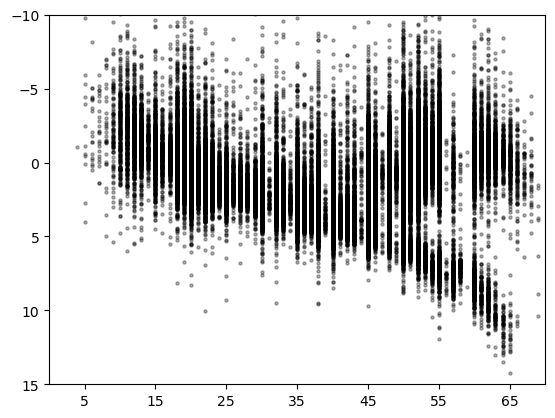

In [137]:
plt.scatter( x = df_sorted['SpType2_numeric'], y = df_sorted['M_V'], s =5, alpha = 0.3, c='k')
plt.xlim(0,70)
plt.ylim(15,-10)
plt.xticks(range(5,75,10))
plt.xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
plt.xlabel('Spectral Type')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram (Hipparos catalog)')
plt.show()

**Color Index (B-V) vs. Absolute Magnitude** \
Scatter the `df_clean['B-V']` on the x-axis and the `df_clean['M_V']` on the y-axis. Add the following features:
* In the `plt.scatter` function, give arguments of: `s=5`, `alpha=0.3` and `c='k'`.
* Set a `xlim` of `(-0.5, 2.5).
* Set a `ylim` of `(15, -10).
* Title the x-axis `'Color Index (B-V)'`.
* Title the y-axis `Absolute Magnitude`.
* Give a title of `H-R Diagram (Hipparcos catalog)`.

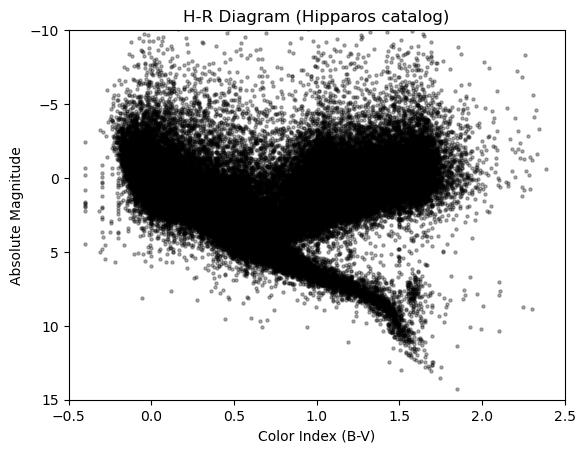

In [139]:
plt.scatter( x = df_sorted['B-V'], y = df_sorted['M_V'], s =5, alpha = 0.3, c='k')
plt.xlim(-0.5,2.5)
plt.ylim(15,-10)
plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram (Hipparos catalog)')
plt.show()

### 6.6 Highlight Luminosity Classes
Great! Finally, we want to difference between our three main luminosity classes:
* Main Sequence (V), aka what our sun is
* Giants (III)
* Supergiants(I)

Run the cell below.

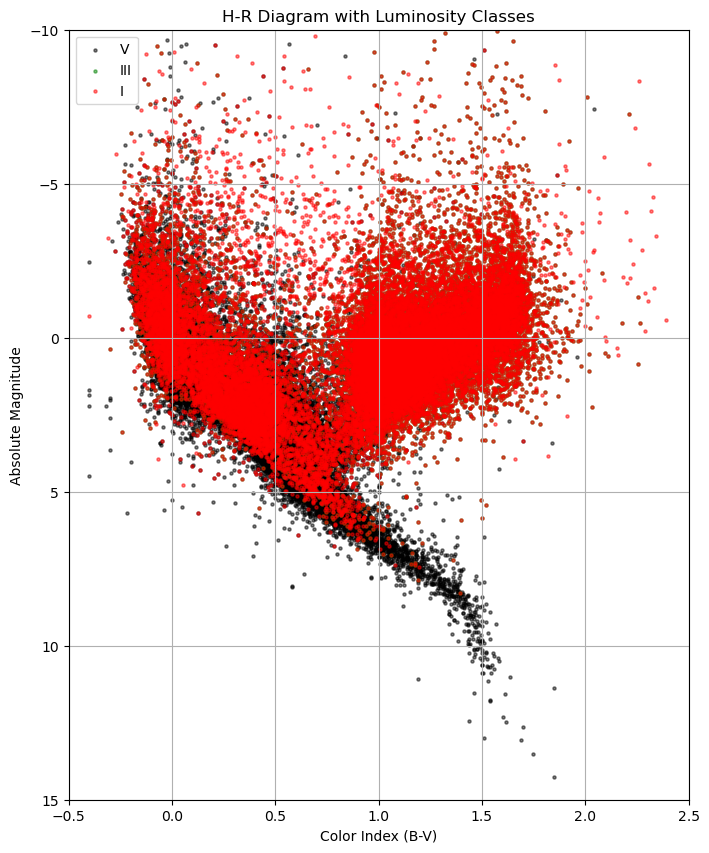

In [141]:
def plot_luminosity_class(df, label, color):
    mask = df['SpType'].str.contains(label, na=False)
    plt.scatter(df[mask]['B-V'], df[mask]['M_V'], s=5, label=label, c=color, alpha=0.5)

plt.figure(figsize=(8,10))
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)
plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram with Luminosity Classes')

plot_luminosity_class(df_sorted, 'V', 'black')  # Main Sequence
plot_luminosity_class(df_sorted, 'III', 'green')  # Giants
plot_luminosity_class(df_sorted, 'I', 'red')  # Supergiants

plt.legend()
plt.show()


With the example above, now plot the following types **WITH** and then **WITHOUT** the ones above:
* Subdwarfs (VI)
* White dwarfs (VII)
* Subgiants (IV)
* Bright giants (II)

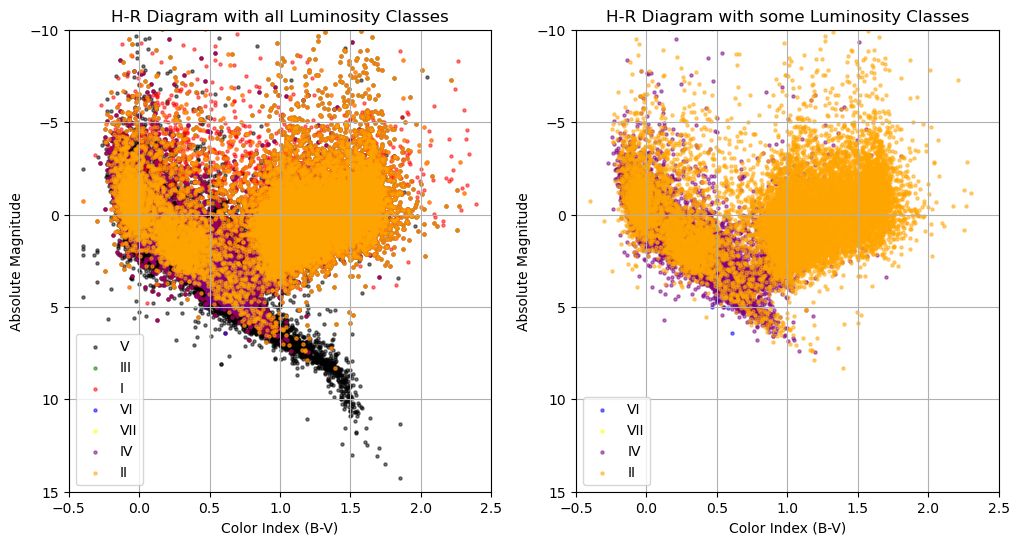

In [158]:
# with
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

def plot_luminosity_class(df, label, color, ax):
    mask = df['SpType'].str.contains(label, na=False)
    ax.scatter(df[mask]['B-V'], df[mask]['M_V'], s=5, label=label, c=color, alpha=0.5)
axes[0].grid()
axes[0].set_xlim(-0.5, 2.5)
axes[0].set_ylim(15, -10)
axes[0].set_xlabel('Color Index (B-V)')
axes[0].set_ylabel('Absolute Magnitude')
axes[0].set_title('H-R Diagram with all Luminosity Classes')

plot_luminosity_class(df_sorted, 'V', 'black',axes[0])  # Main Sequence
plot_luminosity_class(df_sorted, 'III', 'green',axes[0])  # Giants
plot_luminosity_class(df_sorted, 'I', 'red',axes[0]) # Supergiants
plot_luminosity_class(df_sorted, 'VI', 'blue',axes[0]) #subdwarfs
plot_luminosity_class(df_sorted, 'VII', 'yellow',axes[0]) #white dwarfs
plot_luminosity_class(df_sorted, 'IV', 'purple',axes[0]) #subgiants
plot_luminosity_class(df_sorted, 'II', 'orange',axes[0]) #bright giants
axes[0].legend()


#without
axes[1].grid()
axes[1].set_xlim(-0.5, 2.5)
axes[1].set_ylim(15, -10)
axes[1].set_xlabel('Color Index (B-V)')
axes[1].set_ylabel('Absolute Magnitude')
axes[1].set_title('H-R Diagram with some Luminosity Classes')

plot_luminosity_class(df_sorted, 'VI', 'blue',axes[1]) #subdwarfs
plot_luminosity_class(df_sorted, 'VII', 'yellow',axes[1]) #white dwarfs
plot_luminosity_class(df_sorted, 'IV', 'purple',axes[1]) #subgiants
plot_luminosity_class(df_sorted, 'II', 'orange',axes[1]) #bright giants
axes[1].legend()


plt.show()

Submit your FITS file and this notebook to Gradescope!